#Add a 20% dropout layer after every max pooling layer follwed by 50% dropout after the dense layer.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
Image_Width=200
Image_Height=200
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       7

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_it = datagen.flow_from_directory('C:/Users/Welcome/Documents/Dataset/training_set',class_mode='categorical', batch_size=128, target_size=(200, 200))
test_it = datagen.flow_from_directory('C:/Users/Welcome/Documents/Dataset/test_set',class_mode='categorical', batch_size=128, target_size=(200, 200))

Found 5319 images belonging to 2 classes.
Found 2032 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_it,validation_data=test_it, epochs=5)

Epoch 1/5
42/42 [==============================] - 424s 10s/step - loss: 4.8333 - accuracy: 0.7143 - val_loss: 0.6960 - val_accuracy: 0.5015
Epoch 2/5
42/42 [==============================] - 403s 10s/step - loss: 0.6189 - accuracy: 0.7439 - val_loss: 0.6985 - val_accuracy: 0.5015
Epoch 3/5
42/42 [==============================] - 466s 11s/step - loss: 0.5833 - accuracy: 0.7477 - val_loss: 0.6871 - val_accuracy: 0.5030
Epoch 4/5
42/42 [==============================] - 495s 12s/step - loss: 0.5544 - accuracy: 0.7488 - val_loss: 0.6825 - val_accuracy: 0.5064
Epoch 5/5
42/42 [==============================] - 480s 11s/step - loss: 0.5298 - accuracy: 0.7474 - val_loss: 0.6313 - val_accuracy: 0.5999


Epoch 1/5
42/42 [==============================] - 424s 10s/step - loss: 4.8333 - accuracy: 0.7143 - val_loss: 0.6960 - val_accuracy: 0.5015
Epoch 2/5
42/42 [==============================] - 403s 10s/step - loss: 0.6189 - accuracy: 0.7439 - val_loss: 0.6985 - val_accuracy: 0.5015
Epoch 3/5
42/42 [==============================] - 466s 11s/step - loss: 0.5833 - accuracy: 0.7477 - val_loss: 0.6871 - val_accuracy: 0.5030
Epoch 4/5
42/42 [==============================] - 495s 12s/step - loss: 0.5544 - accuracy: 0.7488 - val_loss: 0.6825 - val_accuracy: 0.5064
Epoch 5/5
42/42 [==============================] - 480s 11s/step - loss: 0.5298 - accuracy: 0.7474 - val_loss: 0.6313 - val_accuracy: 0.5999

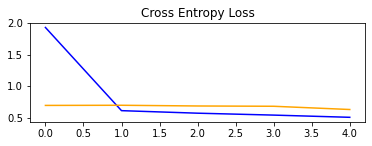

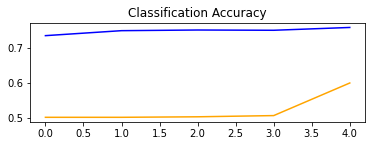

In [ ]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.show()
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show()